# Exploring the Memegenerator Metadata

Here are some demonstrations that can help with initial exploration of the 
memegenerator set of data, which is located here https://labs.loc.gov/experiments/webarchive-datasets/. 

Basic actions demonstrated below:

1. Count the memes represented in the dataset & Verify dataset
2. Count the types of memes in the dataset (visualize with pandas)
3. Count the words in the memes 
4. retrive and display a jpg of a given meme [???]
5. see how many times a given meme was crawled for loc.gov archive [???] 
6. can it be linked to time, ie, see crawl hits over time? (visualize with pandas) [???] 

Other ideas? 
What necessary context?

* _Can we add a hash or some sort of UID to the dataset README so that there is some way to demonstrate file integrity and possibly version?_
* _Can we add a list of the fieldnames and a short description in the README?_

## 1. Count the memes represented in the dataset & Verify dataset

This will require us to download the csv file from loc.gov, open up the csv file, and count the rows.

First, let's open up the csv and take a closer look at it. If we open it using python's csv module, we can read the data into a dictionary, then isolate individual elements according to the associated column heading. Let's find out what the column names are: 

In [1]:
import string
import csv
import pandas as pd

## Start a counter and a list that we can use later
memeCount = 0
memeIDlist = list()

with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata)
    print('Line 9 output:',reader.fieldnames)
    for heading in reader.fieldnames:
        print('Headers output:',heading)

Line 9 output: ['Meme ID\tArchived URL\tBase Meme Name\tMeme Page URL\tMD5 Hash\tFile Size (In Bytes)\tAlternate Text']
Headers output: Meme ID	Archived URL	Base Meme Name	Meme Page URL	MD5 Hash	File Size (In Bytes)	Alternate Text


Before proceeding, take a careful look at the above output. For the output from line 9, notice that the printed output appears to be a list enclosed in square brackets (`[]`) with a single string inside of it. That is not what we would expect. Instead, we want a list of the column headers. If you compare that with the output from line 11 output (labeled `Headers output:`), you'll see that the first string contains the listed values separated by `\t`. It turns out that the data fields in this file are separated by Tab, not comma. That's okay, but we may need to specify that the delimiter is a tab, which will help us to parse the data later on. 

Also notice that the encoding is `utf-16`, which is necessary to represent the extended character types in the file, which contains text in various languages other than English and requires additional character sets. 

With this knowledge, let's print a clean list of the headers. We'll use a counter variable `column` to keep track of how many column headings there are.

In [2]:
column = 0
with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for header in reader.fieldnames:
        column = column + 1
        print('Header '+str(column)+': '+header)

Header 1: Meme ID
Header 2: Archived URL
Header 3: Base Meme Name
Header 4: Meme Page URL
Header 5: MD5 Hash
Header 6: File Size (In Bytes)
Header 7: Alternate Text


So with seven headers, we can expect to find up to seven data values for each row. We know the file is encoded in `utf-16`, and we know that the field delimiters are Tabs. 

Now that we know more about the data format, including the column headers, we can loop through the rows to count them. We can also pull out the "Meme ID" value for each meme represented in the set, which we could use to associate it with other instances. To set this up, try just counting the first few rows first (below, we have stopped the loop with a break statement on line 9, which kicks us out of the loop if the counter value is greater than 2). 

Here is a sample using the counter variable `memeCount` to count the rows as the code loops through, and to print out the `Meme ID` and `Base Meme Name` field contents. For testing, this example limits our activity with a break loop, which escapes from the routine when the count is registered above 2. Once it's working for the first few rows, then it will be time to look through the whole set.  

In [3]:
memeCount = 0
## reopen the file, with the contextual opener as above:
with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        memeCount = memeCount + 1
        print(memeCount,row['Meme ID'],row['Base Meme Name'])
        if memeCount > 2:
            break
print('Total memes counted:',memeCount)        

1 10509464 Spiderman Approves
2 12285257 Alright Then Business Kid
3 20612245 Archer
Total memes counted: 3


That seems to work. Let's do the whole file. To save space in the output, remove the print statements for each row. 

In [4]:
memeCount = 0
## reopen the file, with the contextual opener as above:
with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        memeCount = memeCount + 1
#        print(memeCount,row['Meme ID'],row['Base Meme Name'])
#        if memeCount > 2:
#            break
print('Total memes counted:',memeCount)

Total memes counted: 57652


The information about the set at [loc.gov](https://labs.loc.gov/experiments/webarchive-datasets/) indicates that the memegenerator set includes 57,652 records. Since we got the same number, it appears that the data corresponds and we are looping through it accurately. We've verified that we can successfully open and read through the file!

## 2. Count the types of memes in the dataset

The "Base Meme Name" appears to offer a typology of the memes and refers to the "source" image that was used to create the meme. We could use a spreadsheet program to open the data and to create a pivot table. Let's see if we can get a list of these using python. Using the same technique as above for testing, this time the loop ends after `memeCount` goes above 15. 

* basically, use the above to create a dictionary of the values in the `Base Meme Name` field.

In [5]:
## set up the counter again, and create a dictionary for the types
memeCount = 0
types = list()
counts = dict()

with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    print('Here\'s the types and IDs from each row scanned')
    for row in reader: 
        memeCount = memeCount + 1
        if memeCount > 15:
            break
        memeID = row['Meme ID']
        kind = row['Base Meme Name']
        #uncomment the next row if you want to see the output as the loop goes through each row
        print(memeCount,kind,memeID)

        ## Using the counts dictionary, above, see if the type is already in the dictionary, 
        ## if not noted, add it, if it is noted, increase the count...
        if kind not in counts:
            counts[kind] = 1
        else:
            counts[kind] = counts[kind] + 1

        ## Now add kind to the list of types
        if kind in types:
            continue
        else:
            types.append(kind)

#sort the list
types.sort()
print('\nLIST OF TYPES')
print('List of types:',types)
print('Found',len(types),'types in',memeCount,'rows.\n')
print('DICTIONARY OF TYPES BY COUNT')
print(counts)
for x in counts:
    print(x, counts[x])

Here's the types and IDs from each row scanned
1 Spiderman Approves 10509464
2 Alright Then Business Kid 12285257
3 Archer 20612245
4 Futurama Fry 20614628
5 One Does Not Simply 24194267
6 Insanity Wolf 10178734
7 Butthurt Dweller 10178750
8 Philosoraptor 10178758
9 Butthurt Dweller 10178763
10 Foul Bachelor Frog 10178766
11 Philosoraptor 10178770
12 Foul Bachelor Frog 10178776
13 Foul Bachelor Frog 10178785
14 Philosoraptor 10178788
15 Chemistry Cat 10178798

LIST OF TYPES
List of types: ['Alright Then Business Kid', 'Archer', 'Butthurt Dweller', 'Chemistry Cat', 'Foul Bachelor Frog', 'Futurama Fry', 'Insanity Wolf', 'One Does Not Simply', 'Philosoraptor', 'Spiderman Approves']
Found 10 types in 16 rows.

DICTIONARY OF TYPES BY COUNT
{'Spiderman Approves': 1, 'Alright Then Business Kid': 1, 'Archer': 1, 'Futurama Fry': 1, 'One Does Not Simply': 1, 'Insanity Wolf': 1, 'Butthurt Dweller': 2, 'Philosoraptor': 3, 'Foul Bachelor Frog': 3, 'Chemistry Cat': 1}
Spiderman Approves 1
Alright Th

Remove `memeCount` break loop to count types in the whole dataset. Since we don't really need the list anymore, we'll just use one dictionary called `counts`. *This should change to `typesDict` for a future cleanup.*

In [6]:
## set up the counter again, and create a dictionary for all the types in the dataset
memeCount = 0
typesDict = dict()

with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        memeCount = memeCount + 1
        memeID = row['Meme ID']
        kind = row['Base Meme Name']

        ## Using the counts dictionary, above, see if the type is already in the dictionary, 
        ## if not noted, add it, if it is noted, increase the count...
        if kind not in typesDict:
            typesDict[kind] = 1
        else:
            typesDict[kind] += 1

print('Items in the dictionary:',len(typesDict))

Items in the dictionary: 1914


We have noted 1,914 separate indicators describing the base image used in the memes, which suggests that this set has nearly two thousand general types of memes. 

To finish, let's use the pandas module to create a graph of the main types. 

Let's just find the types that have 1,000 or more examples and add them to a dictionary called `larges`:

In [7]:
larges = dict()
for key, val in typesDict.items():
    if val >= 300:
        larges[key] = val
#print larges.value()
print('There are this many items in this dictionary:',len(larges), type(larges))
print(larges)

There are this many items in this dictionary: 23 <class 'dict'>
{'Futurama Fry': 660, 'Insanity Wolf': 610, 'Butthurt Dweller': 363, 'Philosoraptor': 530, 'Foul Bachelor Frog': 469, 'Joseph Ducreux': 414, 'Success Kid': 510, 'Y U No': 766, 'Socially Awkward Penguin': 446, 'Yo Dawg': 361, 'Good Guy Greg': 387, 'Forever Alone': 414, 'Courage Wolf': 375, 'Advice Yoda Gives': 419, 'The Most Interesting Man In The World': 507, 'Chuck Norris': 343, 'success baby': 344, 'Trollface': 308, 'Slowpoke': 396, 'Willy Wonka': 355, 'Conspiracy Keanu': 337, 'Annoying Gamer Kid': 331, 'we got a badass over here': 377}


Now that the types have been identified and counted, it is possible to visualize the results. We can use the "pandas" library to create a bar chart as an initial example. More complex visualizations are also possible, if you look at the [module's documentation](https://pandas.pydata.org/pandas-docs/). 

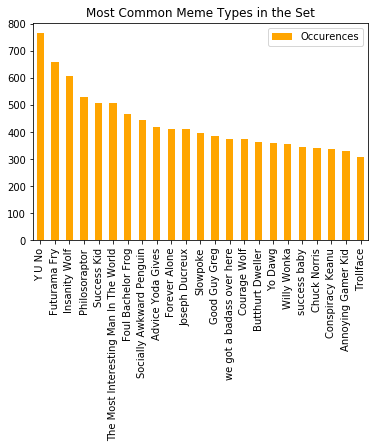

In [9]:
## Use pandas to create a bar chart and sort from largest to smallest
pd.Series(larges).sort_values()

graphable = pd.Series(larges).sort_values(ascending=False)

df = pd.DataFrame(graphable, columns=['Occurences'])

ax = df.plot.bar(color='Orange').set_title('Most Common Meme Types in the Set')

# 3. Count the words in the memes

In this section, we will look more closely at the data included in the `Alternate Text` field. 
This field contains transcriptions of the text overlayed on most of the meme images. 
We will look at how to isolate and identify the words, count the words, and then 
calculate the average number of words. 


In [10]:
rowCount = 0
wordCountsTest = dict()
numWordsTest = dict() 

with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        rowCount = rowCount + 1
        if rowCount > 20:
            break
        ## Uncomment the row below if you want to print out any of the values.
        #print(row['Base Meme Name'], '|', row['Alternate Text'])
        
        ## Let's take a look at the words recorded from each meme. 
        ## Uncomment the second row below this to print the list of words        
        words = row['Alternate Text'].split(' ')
        #print(words, len(words))
        
        ## Using the numWordsTest dictionary, above, record the number of words in each row
        ## In this example, the words variable is currently a list of the words  
        ## so the len() function will return that value
        numWordsTest[row['Meme ID']] = len(words)            
        
        ## Using the wordCountsTest dictionary, above, 
        ## see if the word is already noted in the dictionary, 
        ## if not noted, add it, if it is noted, increase the count...        
        for word in words:
            if word not in wordCountsTest:
                wordCountsTest[word] = 1
            else:
                wordCountsTest[word] = wordCountsTest[word] + 1

print('The number of words in each row has been recorded for',len(numWordsTest),'rows.')
print(numWordsTest)

print('Word counts list has',len(wordCountsTest),'items. Most frequent occurence is')
print(wordCountsTest)


The number of words in each row has been recorded for 20 rows.
{'10509464': 2, '12285257': 11, '20612245': 9, '20614628': 25, '24194267': 11, '10178734': 4, '10178750': 2, '10178758': 11, '10178763': 6, '10178766': 12, '10178770': 11, '10178776': 17, '10178785': 6, '10178788': 11, '10178798': 7, '10178837': 16, '10178888': 7, '10178897': 4, '10178908': 8, '10178914': 7}
Word counts list has 132 items. Most frequent occurence is
{'seems': 1, 'legit': 1, 'Fret': 1, 'not': 2, 'I': 1, 'stayed': 1, 'at': 1, 'a': 2, 'Holiday': 1, 'Inn': 1, 'Express': 1, 'last': 1, 'night': 1, 'hello': 1, 'airplanes?': 1, 'yeah,': 1, 'this': 1, 'is': 1, 'blimps.': 1, 'Yeah,': 1, 'you': 1, 'win.': 1, 'LEGS': 2, 'IN': 1, 'COVER.': 2, 'TOO': 2, 'HOT.': 1, 'OUT': 1, 'OF': 1, 'cold.': 1, 'One': 1, 'leg': 1, 'out.': 1, 'Just': 1, 'right': 1, 'BUt': 1, 'Scared': 1, 'monster': 1, 'under': 1, 'the': 2, 'bed': 1, 'will': 1, 'eat': 1, 'me': 1, 'one': 1, 'does': 1, 'simply': 1, '': 7, 'put': 1, 'toothpaste': 1, 'back': 1

In [12]:
## Using the two short dictionaries above, let's get some more useful information.
## Because there is punctuation and capitalization, we need to parse the strings a bit 
## more closely. Otherwise `fret` and `Fret` will be counted separately and so would
## `out` and `out.`. 
## This block uses python's module

## Dictionaries
## numWords counts the number of strings separated by spaces in each meme, retrievable by Meme ID
## wordCounts records the times a particular string occurs in any meme
rowCount = 0
wordCounts = dict()
numWords = dict() 

with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        rowCount = rowCount + 1
        words = row['Alternate Text'].split()
        numWords[row['Meme ID']] = len(words) # Creates a list of values reflecting the number of words in each meme image           
        for word in words:
            ## Before passing words to the dictionary, let's try to clean them up 
            word = word.lstrip().rstrip() #remove whitespace before and after
            word = word.translate(word.maketrans('', '', string.punctuation)) #remove punctuation
            word = word.lower() #make all in the string lowercase, NB: we have not controlled for any unknown transformations that may happen to non-Roman letter sets and strings
            if word not in wordCounts:
                wordCounts[word] = 1
            else:
                wordCounts[word] = wordCounts[word] + 1
                
## Evaluate some of the outputs to check where we are
print('WORD COUNTS')
print('Counted words for',len(numWords),'items')
print('Row count:',rowCount,'\n')

print('WORDS COUNTED')
print('Elements in word counts',len(wordCounts),'\nIn other words, noting',len(wordCounts),'separate character strings.')
## to view the dictionary, uncomment the line below
#print(wordCounts)

## Let's take a look at the information in the wordCounts dictionary, get the max occurence
#for count in word

WORD COUNTS
Counted words for 57652 items
Row count: 57652 

WORDS COUNTED
Elements in word counts 71529 
In other words, noting 71529 separate character strings.


In [13]:
## Convert the word counts to tuples, sort, and view the most frequent words

## This code sorts by the values calculated in the character strings stored as words in wordCounts
'''
#create tuples
t = list(wordCounts.items())
t.sort(reverse=False)
print(t[0:9])
'''
## This code sorts by the values, ie, the word counts
#create tuples then loop through and reverse so we can sort by the counts
l = list() # this will be an ordered list of tuples, sorted from highest word count to lowest
for key, val in wordCounts.items():
    l.append( (val, key) )
l.sort(reverse=True)
print(l[0:25])


[(9259, 'a'), (6565, 'que'), (6076, 'de'), (5562, 'i'), (5443, 'no'), (4967, 'me'), (4881, 'la'), (4785, 'el'), (4711, 'you'), (4501, 'the'), (4072, 'y'), (3604, 'to'), (3388, 'en'), (3038, 'не'), (2893, 'se'), (2763, 'si'), (2690, 'в'), (2585, 'un'), (2528, 'я'), (2467, 'te'), (2430, ''), (2391, 'es'), (2112, 'is'), (2085, 'in'), (1890, 'на')]


By looking through these lists of words and counts, we chose some of the most common English words that stood out. Because we were only interested in these words, we created a list of certain words that had high counts, which are represented below in the `highCountEnglishWords` list, which we can then map against the number of occurences in a bar chart.

In [15]:
## Based on the sorted counts, we chose a few English words with high occurence
highCountEnglishWords = [
    'it',
    'is',
    'for',
    'your',
    'that',
    'meme', 
    'facebook', 
    'internet',
    'everywhere',
    'people',
    'aliens',
    'world',
    'everyone',
    'someone',
    'mainstream',
    'party',
    'cool',
    'mom',
    'roleplayers',
    'pokemon',
    'mother',
    'pizza',
    'yeah']

countsListInteresting = list()
for word in highCountEnglishWords:
    countsListInteresting.append(wordCounts[word])
    print(word,wordCounts[word])


it 1407
is 2112
for 1335
your 1309
that 1226
meme 429
facebook 586
internet 236
everywhere 452
people 384
aliens 231
world 230
everyone 139
someone 136
mainstream 153
party 106
cool 105
mom 103
roleplayers 93
pokemon 88
mother 74
pizza 70
yeah 103


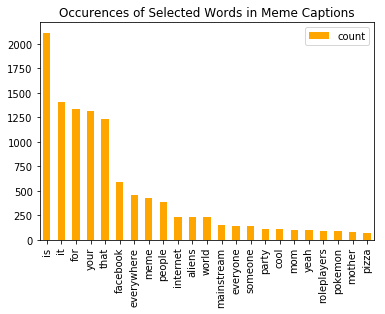

In [16]:
## Let's do another bar chart

df2 = pd.DataFrame({ 'word':highCountEnglishWords, 
                    'count':countsListInteresting
                  },
                  index=highCountEnglishWords).sort_values(by='count', ascending=False)

ax = df2.plot.bar(color='Orange').set_title('Occurences of Selected Words in Meme Captions')
    
## create a word cloud? 

## Calculate the average number of words in each meme                

Earlier in this section, we created a list of the number of words in each meme 
(that is, the number of strings in each `Alternate Text` field delineated by a blank space character).

We will return to the `numWords` list. First, check to make sure that the list is still there:

In [17]:
print(type(numWords))
print(len(numWords))

<class 'dict'>
57652


That looks good. It is a dictionary and should have an item for each row, so if the dictionary length matches the value, this should be the right information. 

Now, let's grab the values and calculate an average

In [18]:
## Create a list for the values
wordLenList = list()
## The commented line below and lines lower down can be used to error check this code block
#dictCounter = 0

## Pull out the values from the numWords dictionary
for key, val in numWords.items():
#    dictCounter = dictCounter + 1
#    if dictCounter > 10:
#        break
#    print(key, val) 
    wordLenList.append(val)

## Calculate the average
averageNumWords = sum(wordLenList)/len(wordLenList)

print('The average number of words in each meme is',averageNumWords)

The average number of words in each meme is 8.60716020259488


So, in this list of 57,652 memes, **the average number of words in a meme is 8.6**.

**NB:** It may be important to remember that this program looks at the strings of texts and identifies "words" based on characters and intervening spaces. Therfore, many of the "words" may be non-English characters, individual characters, strings of numbers, or even emoji. A more accurate description might be to say that memes contain an average of 8.6 character strings, but for the most part these are words. 

# 4. Retrieve and display an image

This is more challenging than initially suspected since the archive URLs contain a date range rather than the specific capture date. But that brings an interesting possibility to count number of times crawled. Can we do both? 

The [LoC exploration demo for loc.gov](https://github.com/LibraryOfCongress/data-exploration/blob/master/LOC.gov%20JSON%20API.ipynb) uses `Image` from `IPython.display` library. Others might use PILlow. 


In [19]:
from IPython.display import Image, display

display(Image(url='http://webarchive.loc.gov/all/20160206075330/http://cdn.meme.am/instances/250x250/10698210.jpg', format='jpg'))

In [20]:
## try to get five from a given meme type e.g., 'Joseph Ducreux'
q = 'Joseph Ducreux'
print(q,typesDict[q])

rowCounter = 0
qCounter = 0
with open('memegenerator.csv', 'r', newline='', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader: 
        rowCounter = rowCounter + 1
        if row['Base Meme Name'] == q:
            qCounter += 1
            if qCounter > 5:
                break
            testURL = row['Archived URL']
            print(qCounter, rowCounter, row['Archived URL'])
            display(Image(url=testURL))


Joseph Ducreux 414
1 17 http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10178888.jpg


2 47 http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10179277.jpg


3 56 http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10179414.jpg


4 71 http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10179566.jpg


5 72 http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10179569.jpg


### Why not just read directly into pandas from the csv? 
This would seem to work as long as we can make visualizations based on the data enumerated in the original csv. However, with the word count information, are calculating some new values. So for the things listed here it may be useful to do operations based on our new dictionaries and analysis, which draws from the csv information. 